In [100]:
import h5py as h5
import numpy as np
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import legwork

import sys
sys.path.append("../src/")
from variations import variations
from galaxy import simulate_mw

%config InlineBackend.figure_format = 'retina'
plt.rc('font', family='serif')
fs = 20

params = {'legend.fontsize': fs,
         'axes.labelsize': fs,
         'xtick.labelsize':0.7*fs,
         'ytick.labelsize':0.7*fs}
plt.rcParams.update(params)

In [2]:
dco_colours = {"BHBH": plt.get_cmap("plasma")(0.2), 
               "BHNS": plt.get_cmap("plasma")(0.5),
               "NSNS": plt.get_cmap("plasma")(0.8)}

dco_types = ["BHBH", "BHNS", "NSNS"]
sim_folder = "../data/simulation_plus_supp/"

total_DCOs_in_MW = np.load("../data/total_DCO_in_MW.npy")
total_bound_DCOs_in_MW = np.load("../data/total_DCO_in_MW_nohubble.npy")

detections = np.load("../data/detections_4yr.npy")
detections_10yr = np.load("../data/detections_10yr.npy")

## Floor's 5 main channels

In [17]:
channels = np.array([
    {
        "label": "other",
        "colour": "#808080"
    },
    {
        "label": "classic",
        "colour": "#118ab2"
    },
    {
        "label": "only stable",
        "colour": "#ef476f"
    },
    {
        "label": "single core CEE",
        "colour": "#ffd166"
    },
    {
        "label": "double core CEE",
        "colour": "#073b4c"
    },
])

resort_channels = [1, 2, 3, 4, 0]

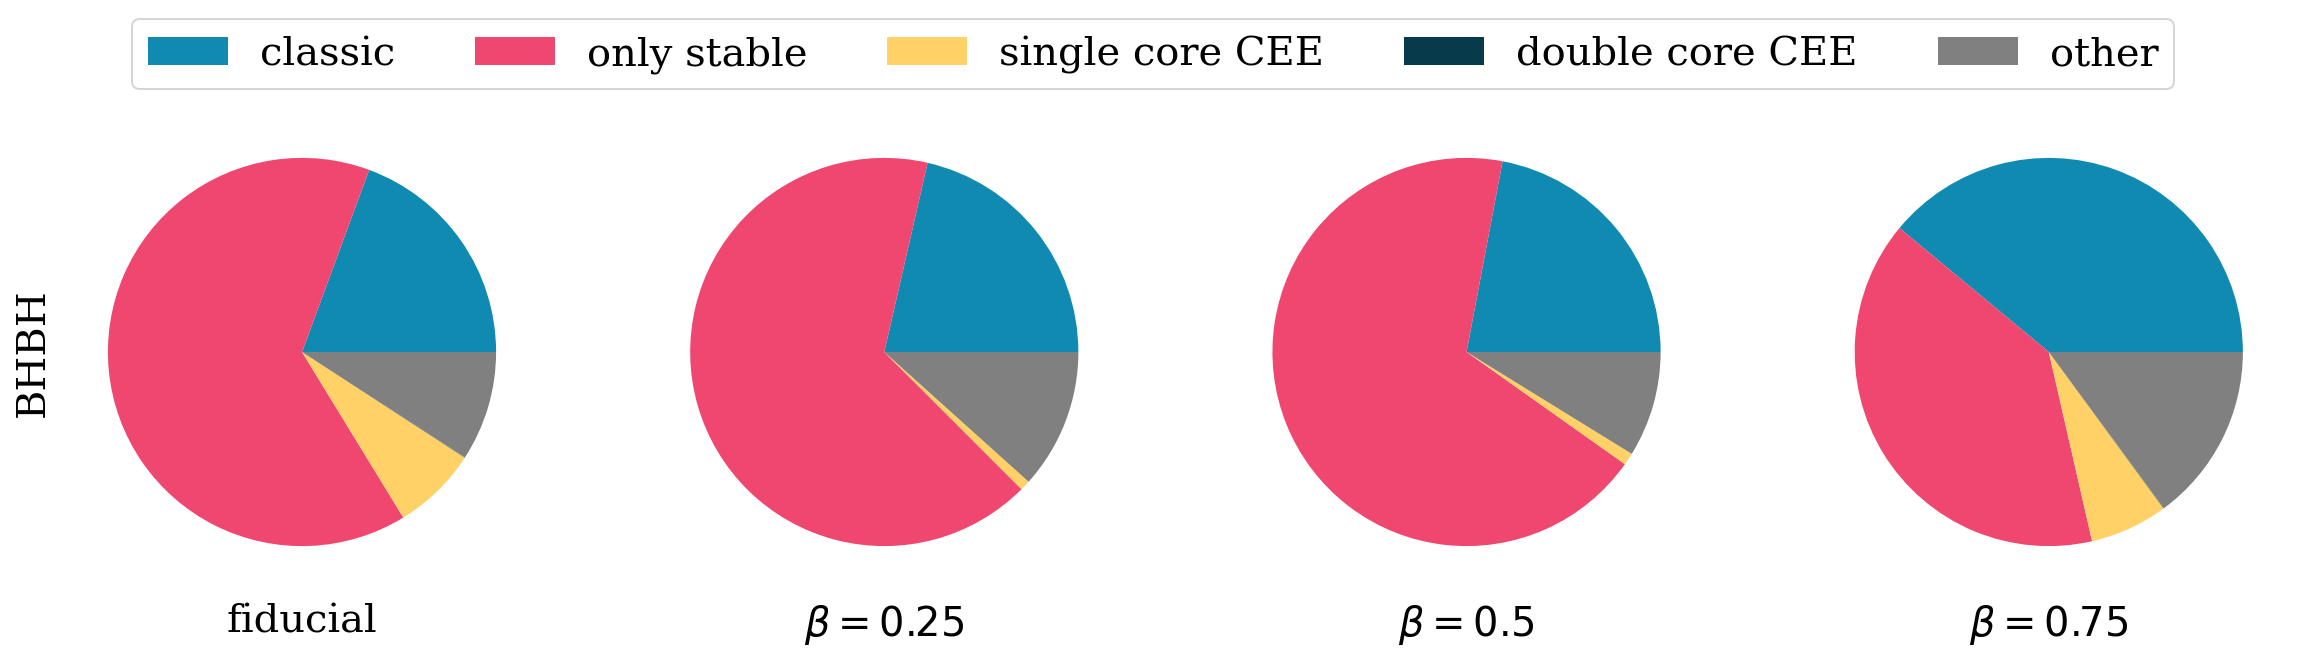

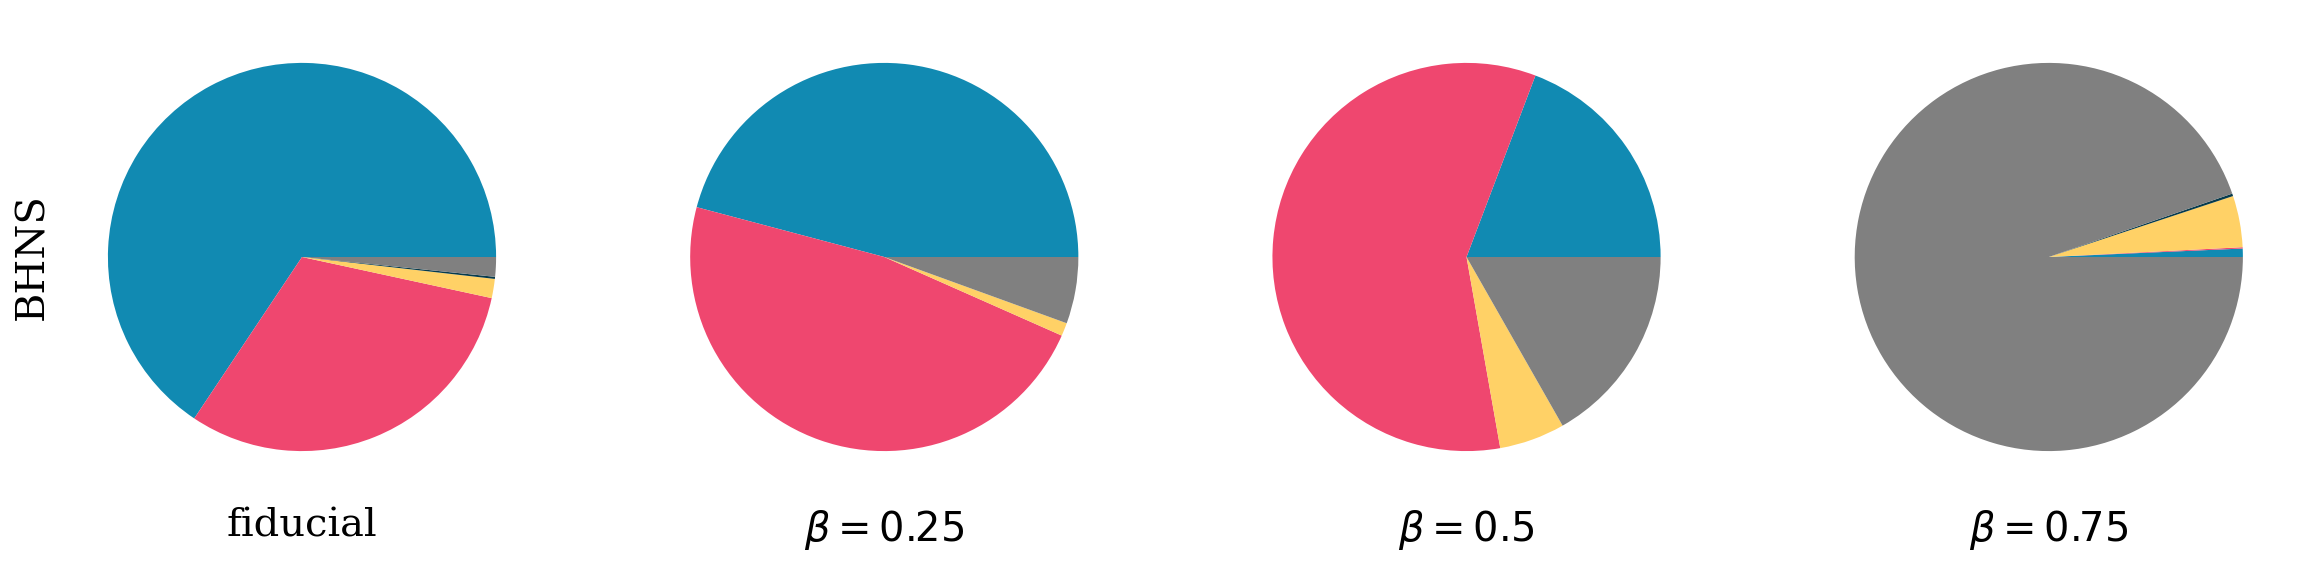

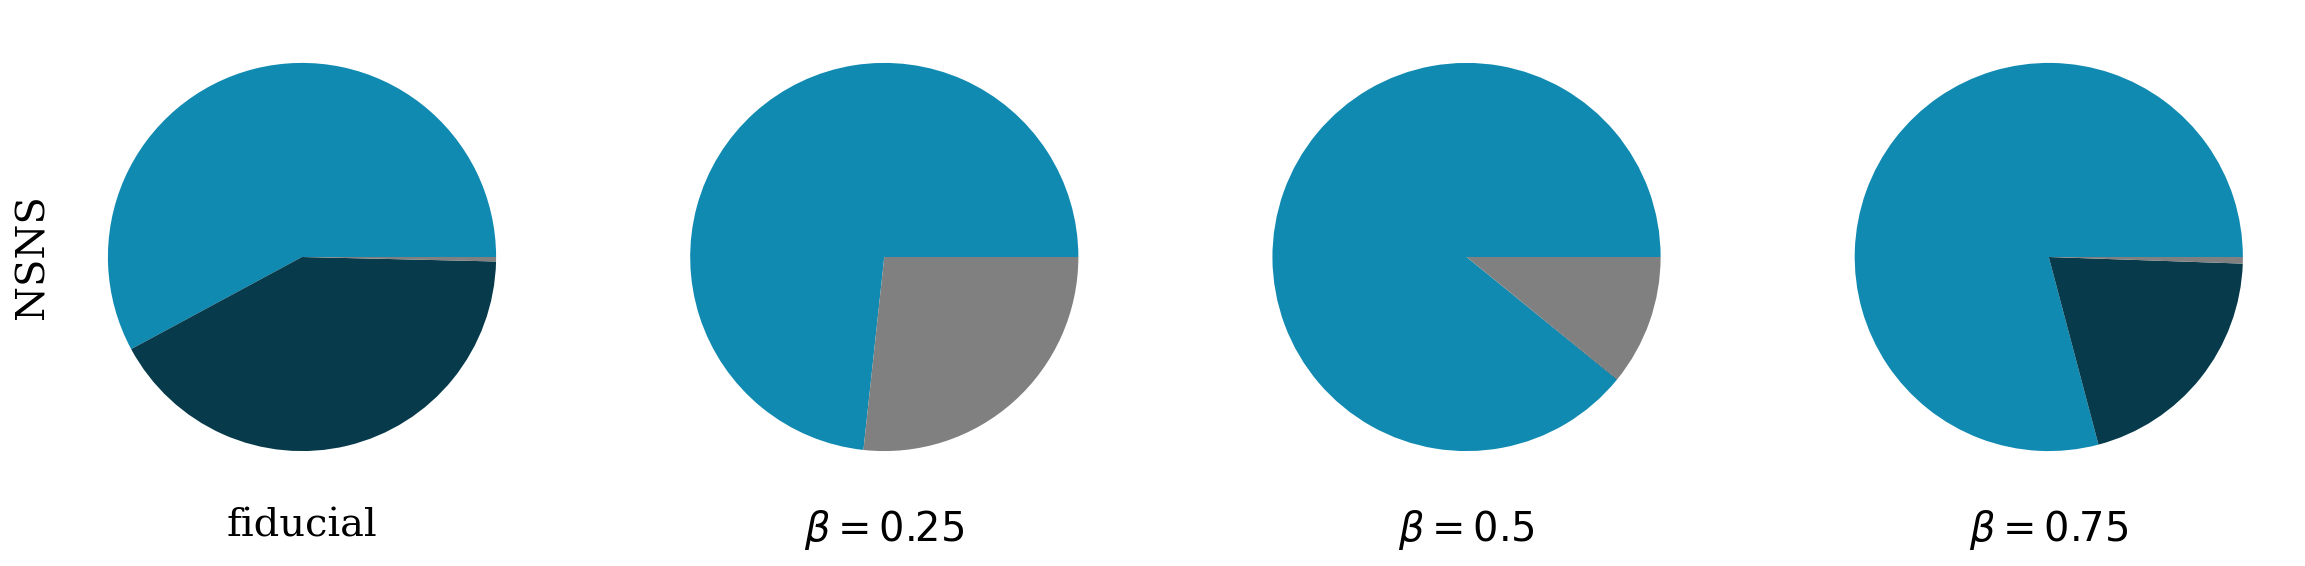

In [26]:
for dco_type in dco_types:
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    for v in range(4):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = np.array([np.sum(data["weight"][data["channel"] == i])
                              for i in resort_channels]) / np.sum(data["weight"])
        colours = np.array([channels[c]["colour"] for c in resort_channels])
        labels = np.array([channels[c]["label"] for c in resort_channels])

        axes[v].pie(fractions, colors=colours, labels=labels, labeldistance=None, normalize=False)
        axes[v].set_xlabel(variations[v]["med"])

    axes[0].set_ylabel(dco_type)
    
    if dco_type == "BHBH":
        handles, labels = axes[-1].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', fontsize=fs, ncol=5)
    
plt.show()

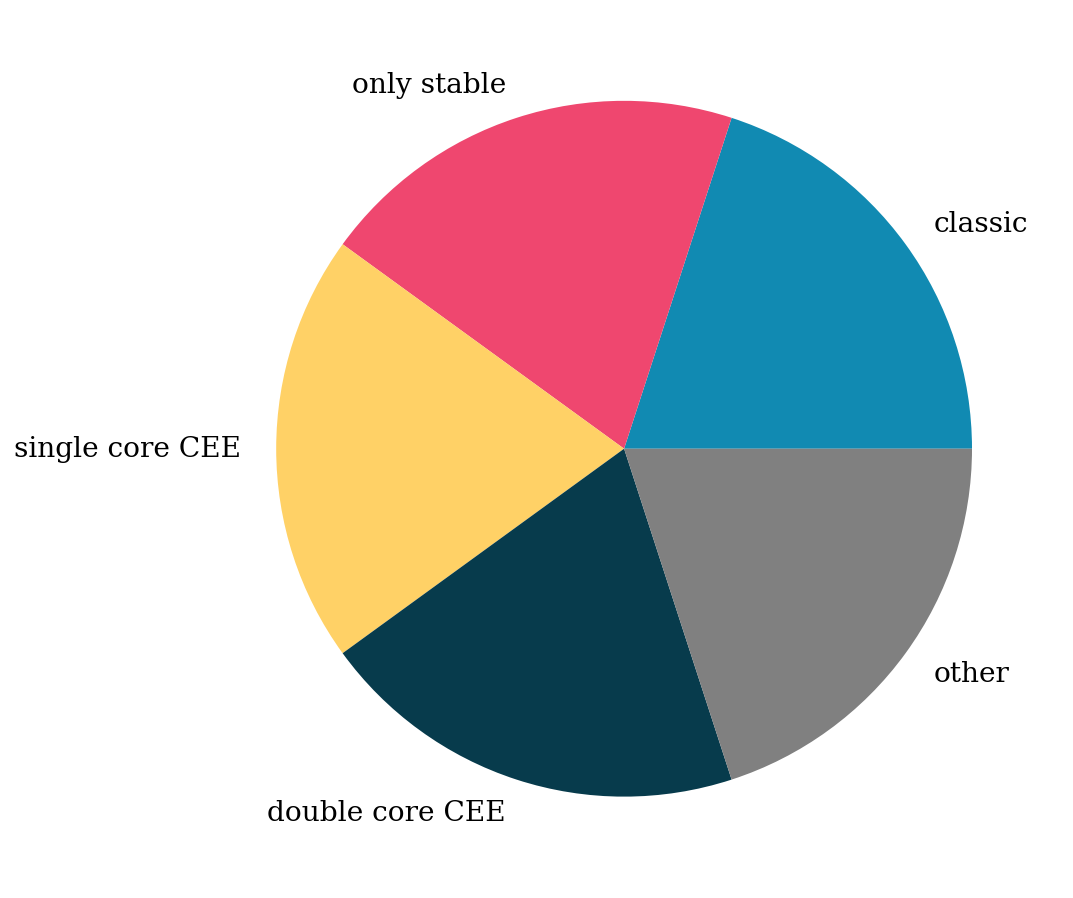

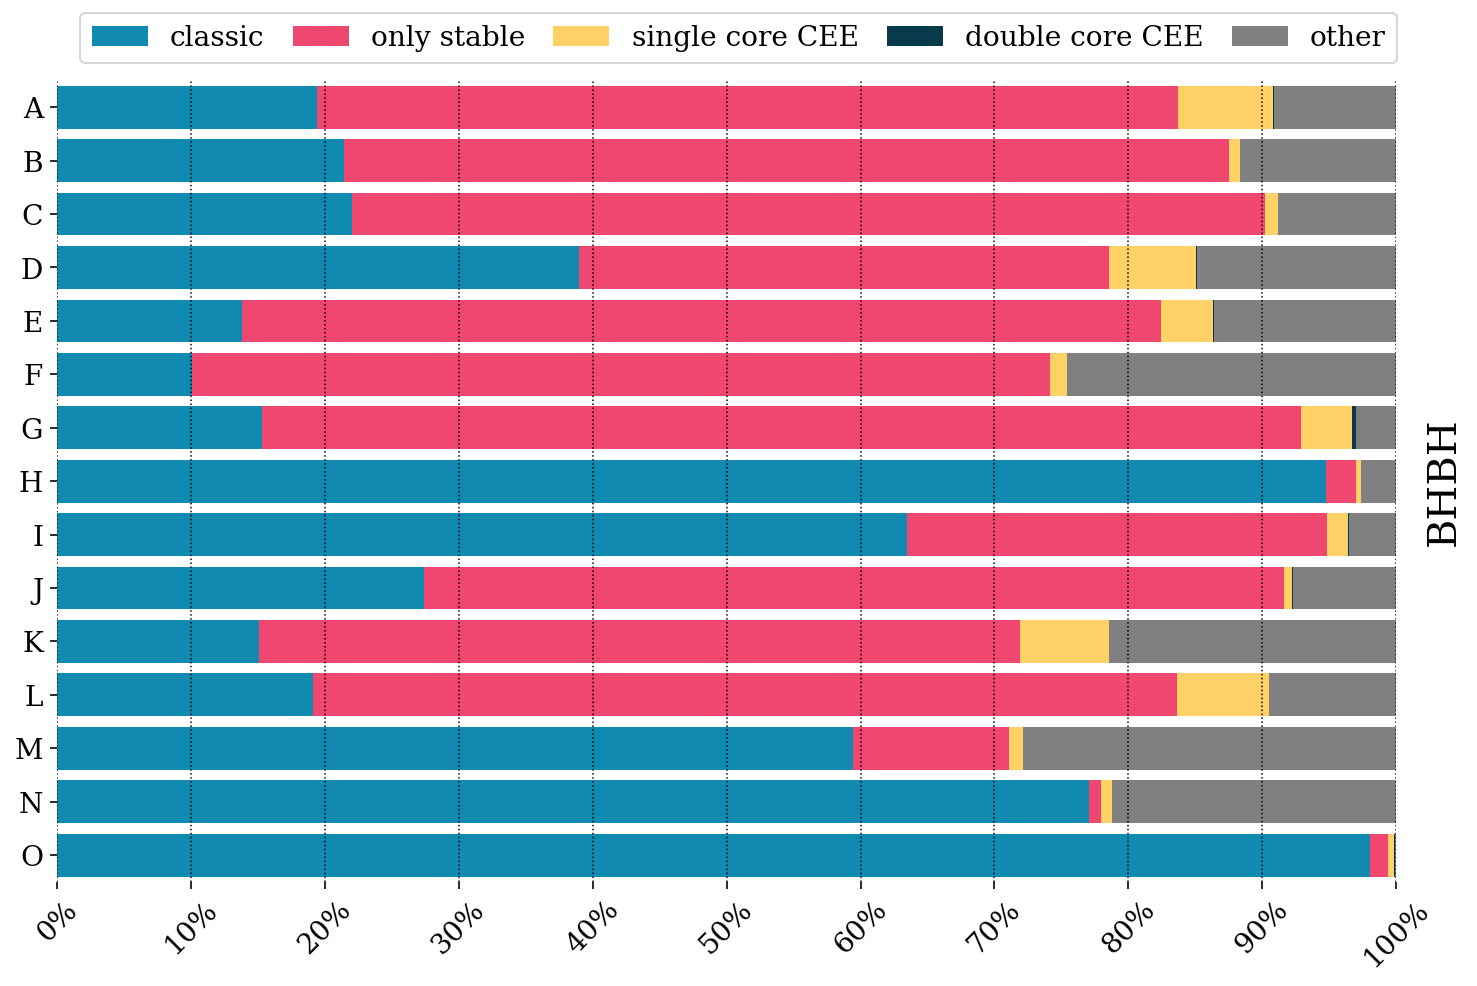

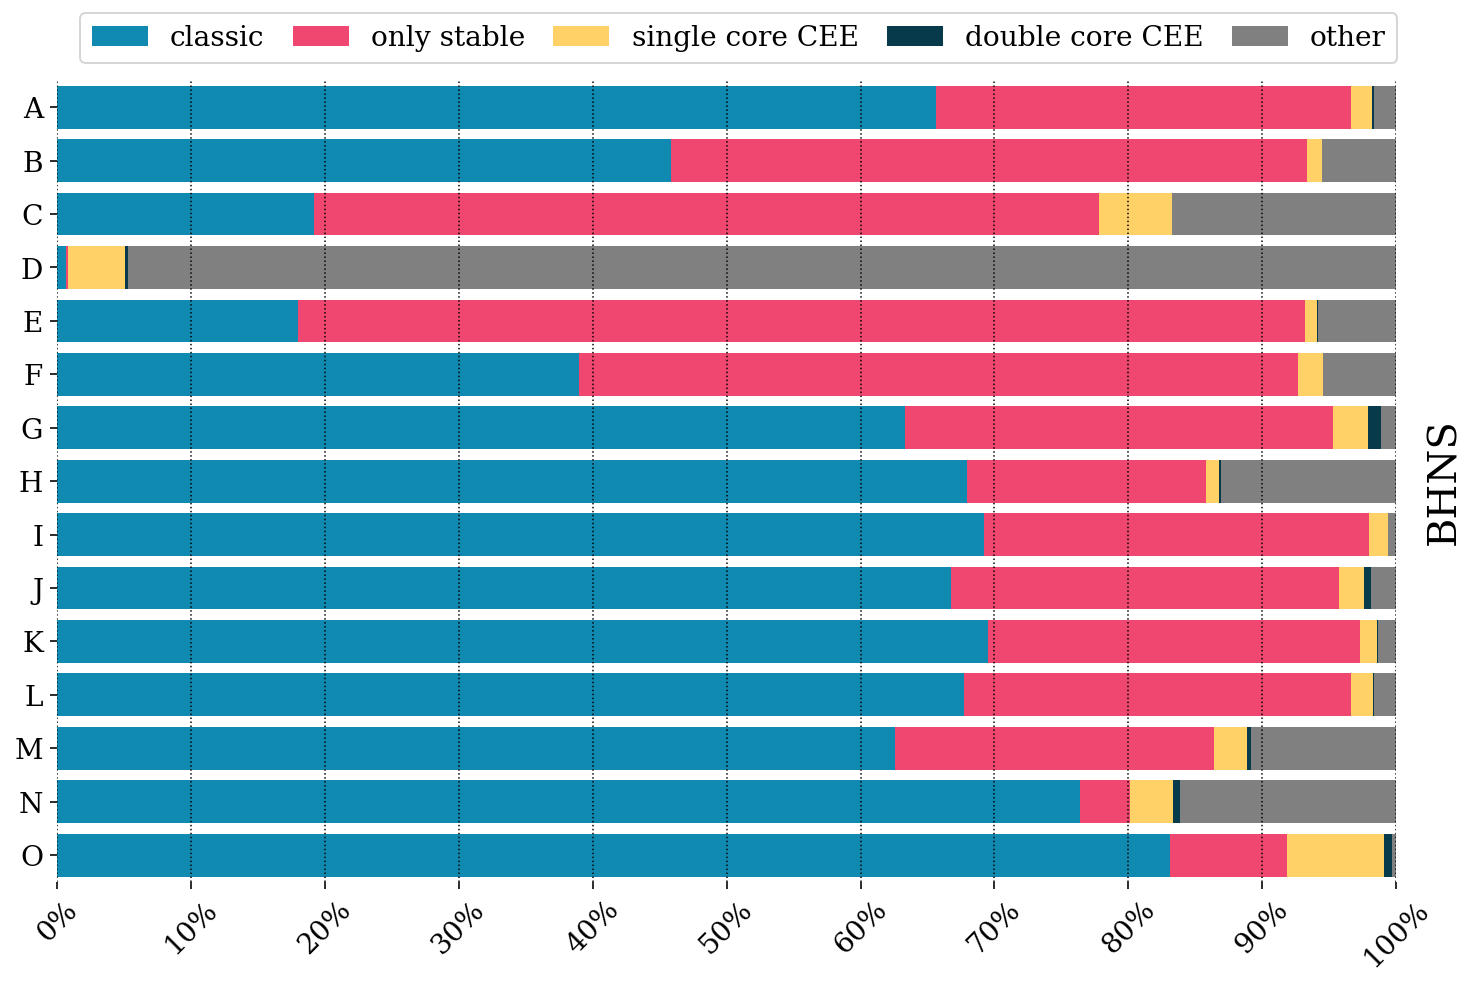

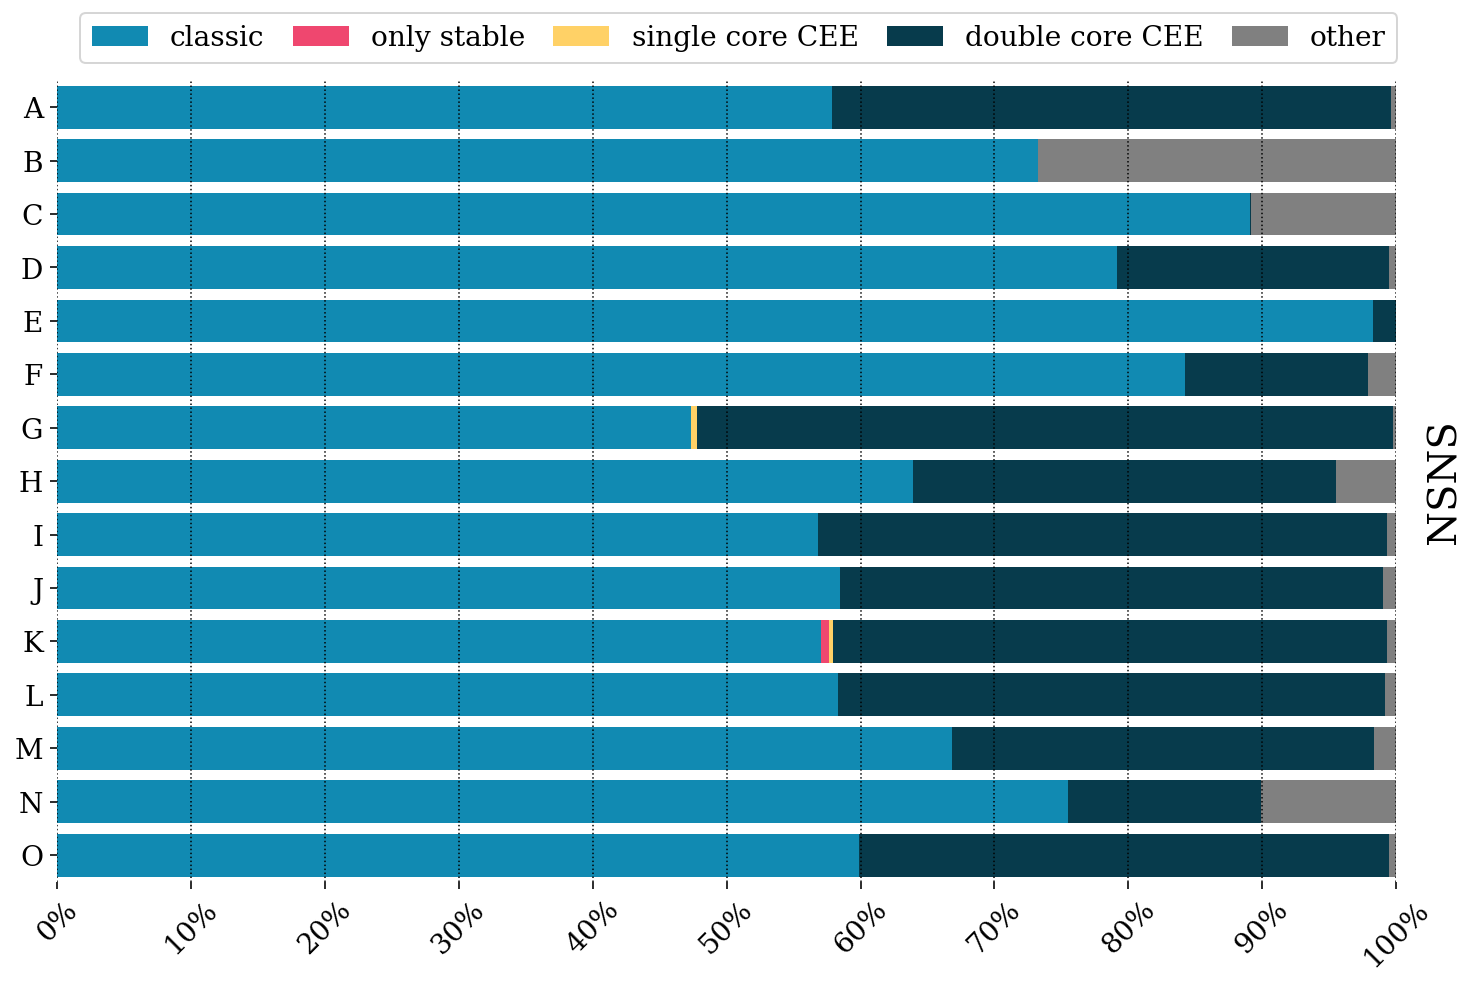

In [92]:
colours = np.array([channels[c]["colour"] for c in resort_channels])
labels = np.array([channels[c]["label"] for c in resort_channels])

fig, ax = plt.subplots()

ax.pie([0.2, 0.2, 0.2, 0.2, 0.2], colors=colours, labels=labels)

handles, leg_labels = ax.get_legend_handles_labels()

for dco_type in dco_types:
    fig, ax = plt.subplots(figsize=(12, 7))
    fig.subplots_adjust(top=0.92)
    
    for v in range(len(variations)):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = np.array([np.sum(data["weight"][data["channel"] == i])
                              for i in resort_channels]) / np.sum(data["weight"])

        ax.barh(y=v, width=fractions, color=colours, left=np.concatenate(([0], fractions.cumsum()[:-1])), label=labels)
        
    ax.set_xlim(0, 1)
    ax.set_xticks(np.arange(0, 1.1, 0.1))
    ax.set_xticklabels(["{:1.0f}%".format(x) for x in np.arange(0, 1.1, 0.1) * 100], rotation=45)
    
    for x in np.arange(0, 1.1, 0.1):
        ax.axvline(x, color="black", linestyle="dotted", lw=0.75)
    
    ax.set_ylim(14.5, -0.5)
    ax.set_yticks(range(len(variations)))
    ax.set_yticklabels([variations[v]["short"] for v in range(len(variations))])
    
    right_ax = ax.twinx()
    right_ax.set_ylabel(dco_type, labelpad=15)
    right_ax.set_yticks([])
    
    fig.legend(handles, labels, loc='upper center', fontsize=0.7*fs, ncol=5, columnspacing=1.0)
    
    # hide the axis frame
    for axis in [ax, right_ax]:
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['left'].set_visible(False)
    
plt.show()

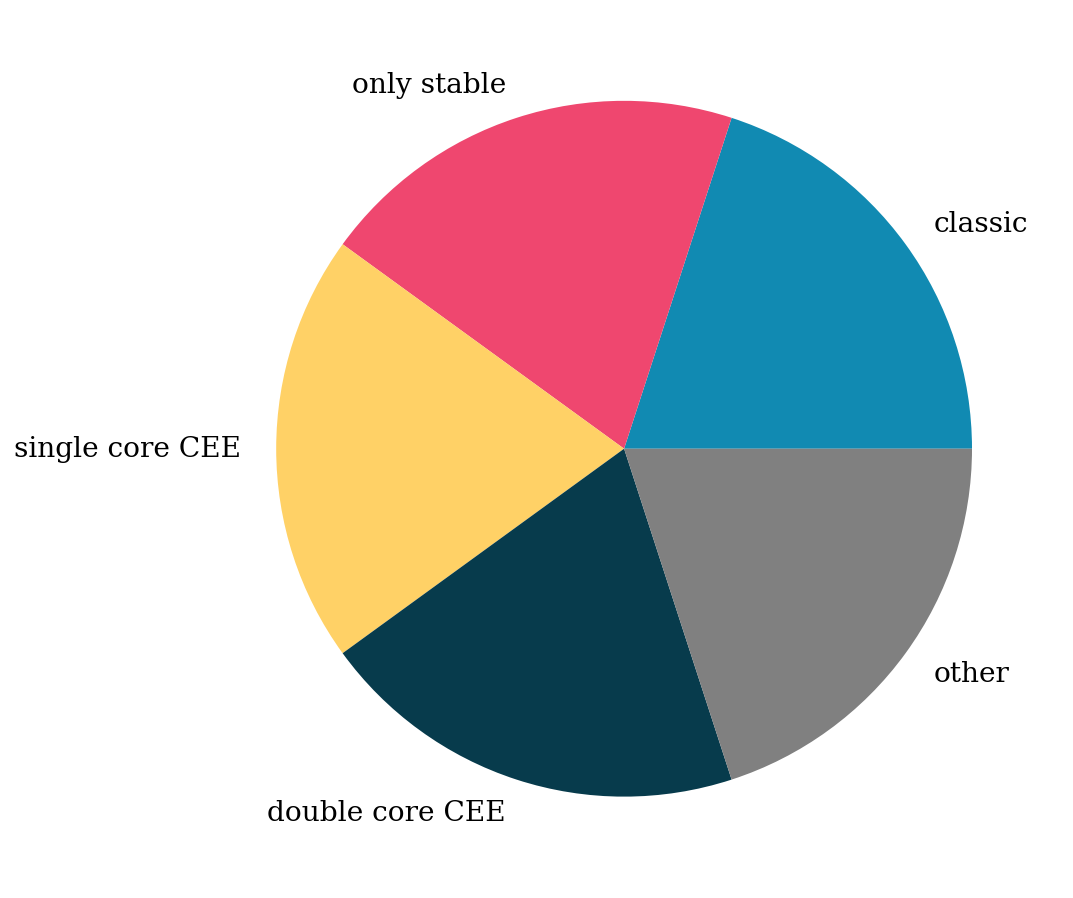

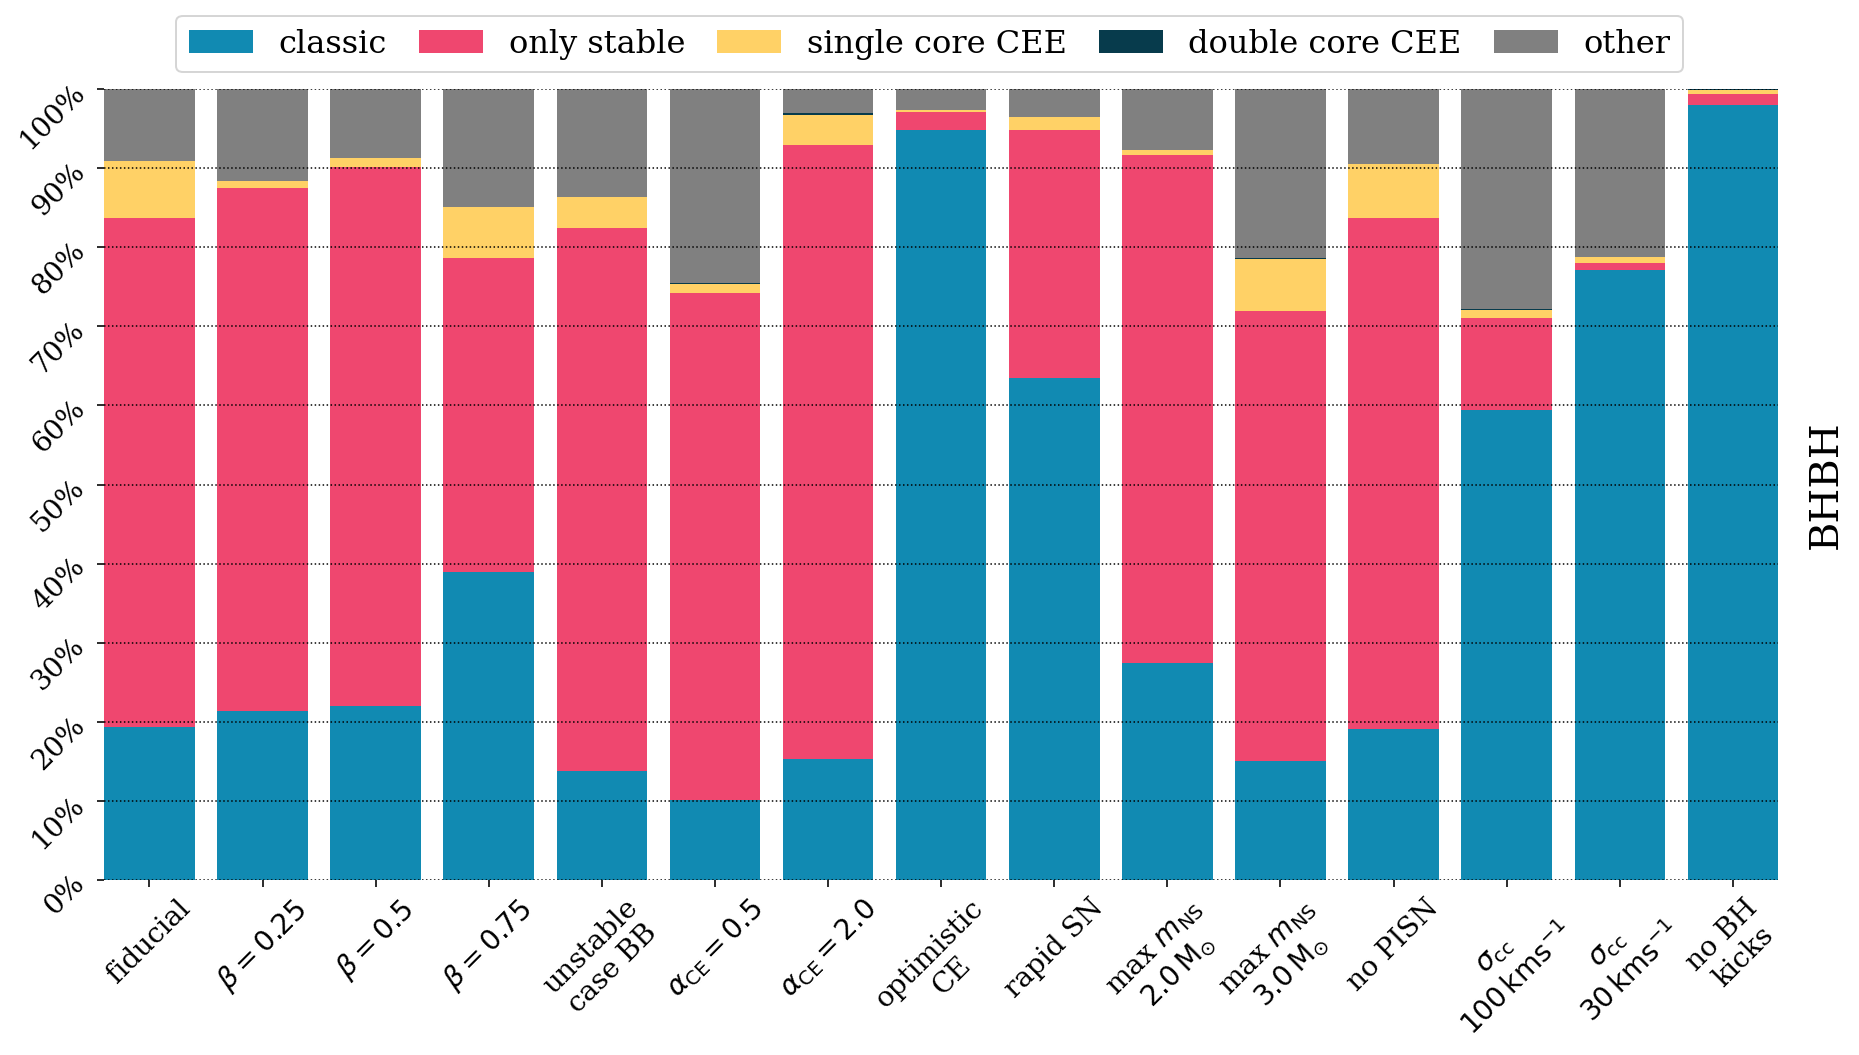

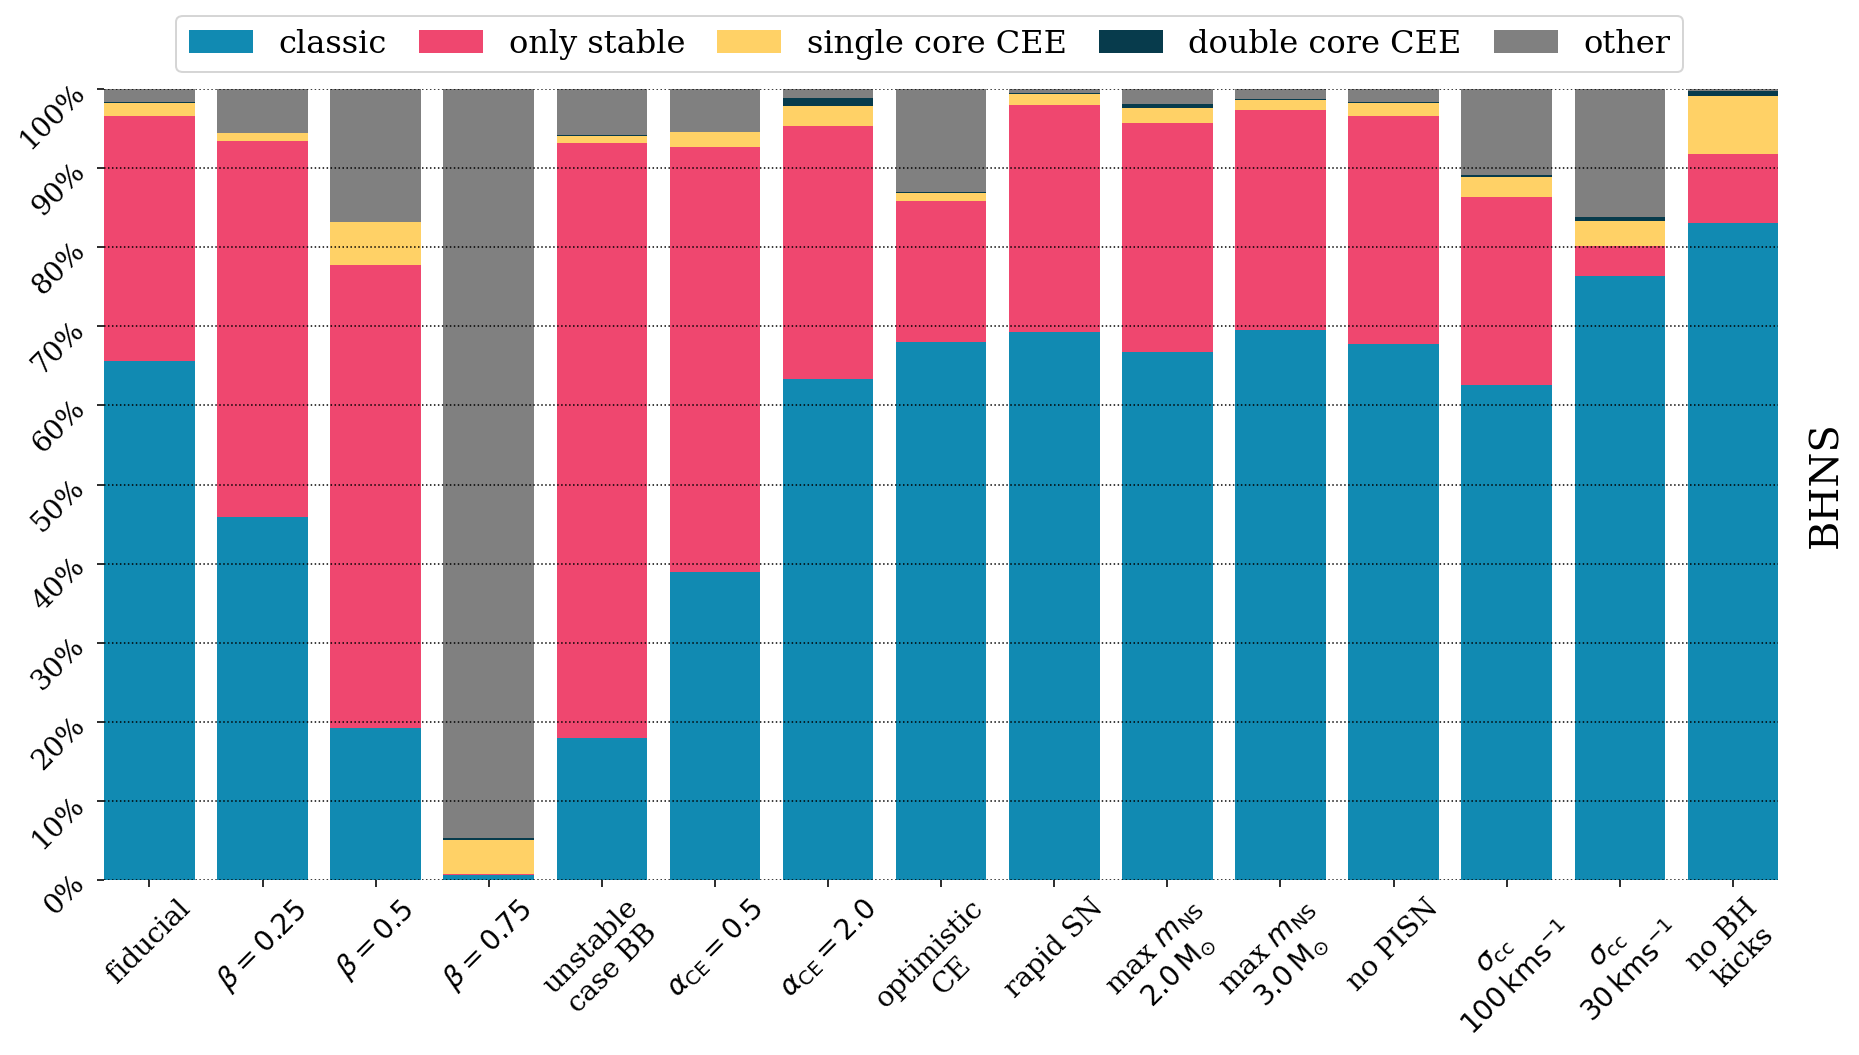

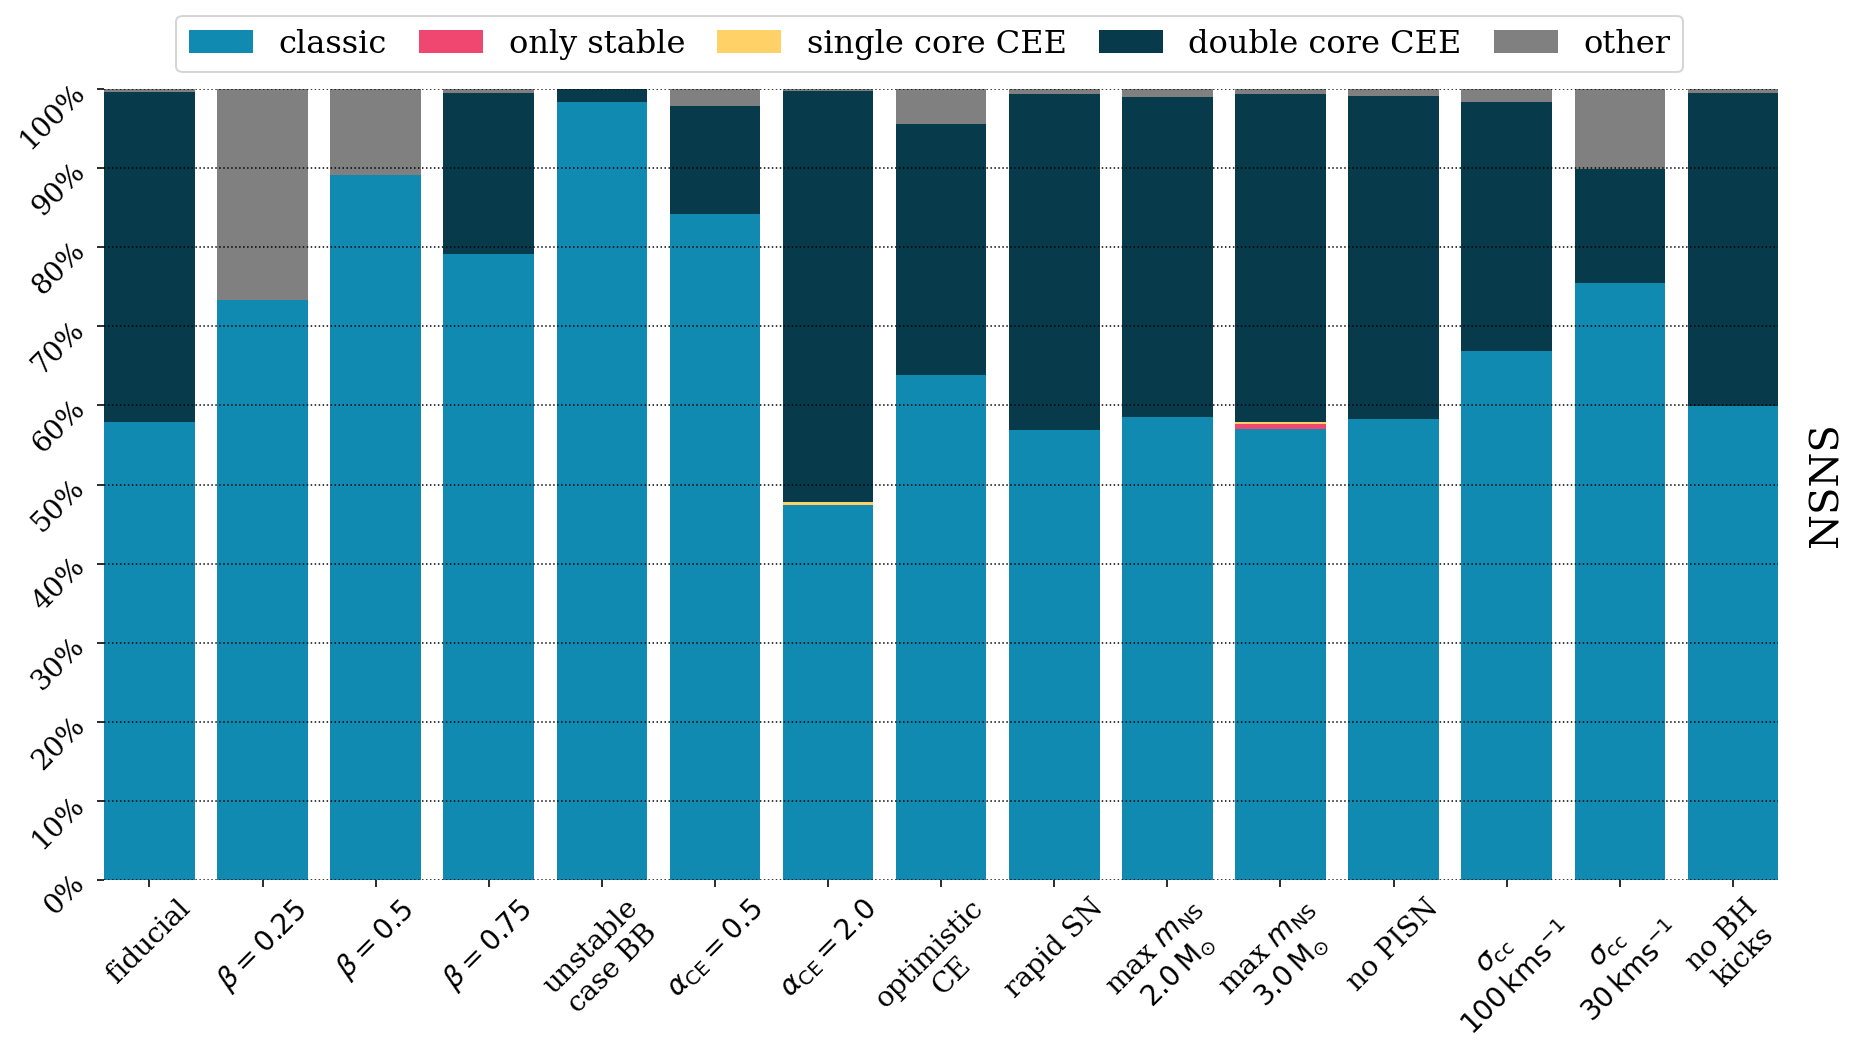

In [96]:
colours = np.array([channels[c]["colour"] for c in resort_channels])
labels = np.array([channels[c]["label"] for c in resort_channels])

fig, ax = plt.subplots()

ax.pie([0.2, 0.2, 0.2, 0.2, 0.2], colors=colours, labels=labels)

handles, leg_labels = ax.get_legend_handles_labels()

for dco_type in dco_types:
    fig, ax = plt.subplots(figsize=(15, 7))
    fig.subplots_adjust(top=0.91)
    for v in range(len(variations)):
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[v]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = full_data["snr"] > 7

            data = full_data[mask]

        fractions = np.array([np.sum(data["weight"][data["channel"] == i])
                              for i in resort_channels]) / np.sum(data["weight"])
        colours = np.array([channels[c]["colour"] for c in resort_channels])
        labels = np.array([channels[c]["label"] for c in resort_channels])

        ax.bar(x=v, height=fractions, color=colours, bottom=np.concatenate(([0], fractions.cumsum()[:-1])))
        
    ax.set_ylim(0, 1)
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    ax.set_yticklabels(["{:1.0f}%".format(x) for x in np.arange(0, 1.1, 0.1) * 100], rotation=45)
    
    for y in np.arange(0, 1.1, 0.1):
        ax.axhline(y, color="black", linestyle="dotted", lw=0.75)
    
    ax.set_xlim(-0.4, 14.4)
    ax.set_xticks(range(len(variations)))
    ax.set_xticklabels([variations[v]["med"] for v in range(len(variations))], rotation=45)
    
    right_ax = ax.twinx()
    right_ax.set_ylabel(dco_type, labelpad=15)
    right_ax.set_yticks([])
    
    fig.legend(handles, labels, loc='upper center', fontsize=0.8*fs, ncol=5, columnspacing=1.0)
    
    # hide the axis frame
    for axis in [ax, right_ax]:
        axis.spines['top'].set_visible(False)
        axis.spines['right'].set_visible(False)
        axis.spines['bottom'].set_visible(False)
        axis.spines['left'].set_visible(False)
    
plt.show()

## Mass transfer cases

In [97]:
MT_case_translate = np.array(["X", "A", "B", "C"])

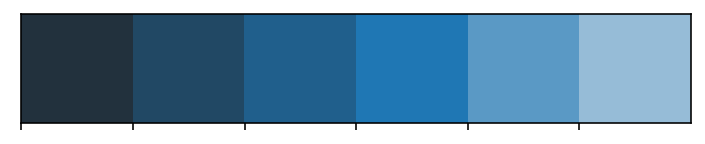

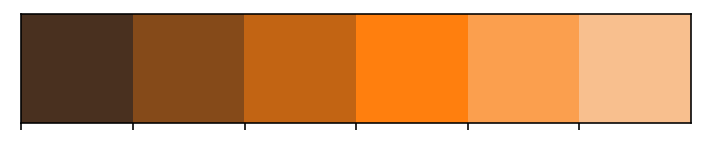

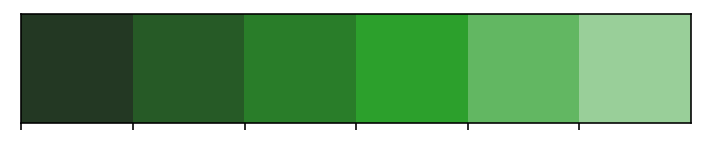

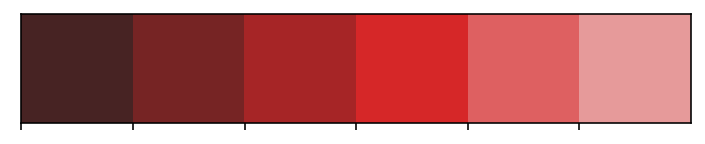

In [115]:
case_colours = np.empty(shape=(4, 6, 3), dtype="object")

maps = sns.color_palette("tab10", 4)
for i, m in enumerate(maps):
    darks = sns.dark_palette(m, 8)
    lights = sns.light_palette(m, 8, reverse=True)[1:]
    case_colours[i, :] = np.array(darks + lights)[1:-2:2]
    sns.palplot(case_colours[i, :])
    
case_colours = case_colours[:, 1:, :]

0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.08980952420815169
1 0 0.0
1 1 0.0
1 2 0.0008365737133020278
1 3 0.0
2 0 0.0
2 1 0.0
2 2 0.6444250602277616
2 3 0.1934182387298368
3 0 0.00023024482295598808
3 1 0.0
3 2 0.06998370629426776
3 3 0.0012966520037241797
0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.01460717532975161
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0005561333456866885
2 0 0.0
2 1 0.0
2 2 0.30969887678759944
2 3 0.6566526208971325
3 0 0.0017330651734136786
3 1 0.0002484602740204771
3 2 0.012010432277363143
3 3 0.00449323591503236
0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.0003208263488951862
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0
2 0 0.0
2 1 0.0
2 2 0.0
2 3 0.5815399712525063
3 0 0.03333399004118782
3 1 0.0
3 2 0.38480521235741083
3 3 0.0


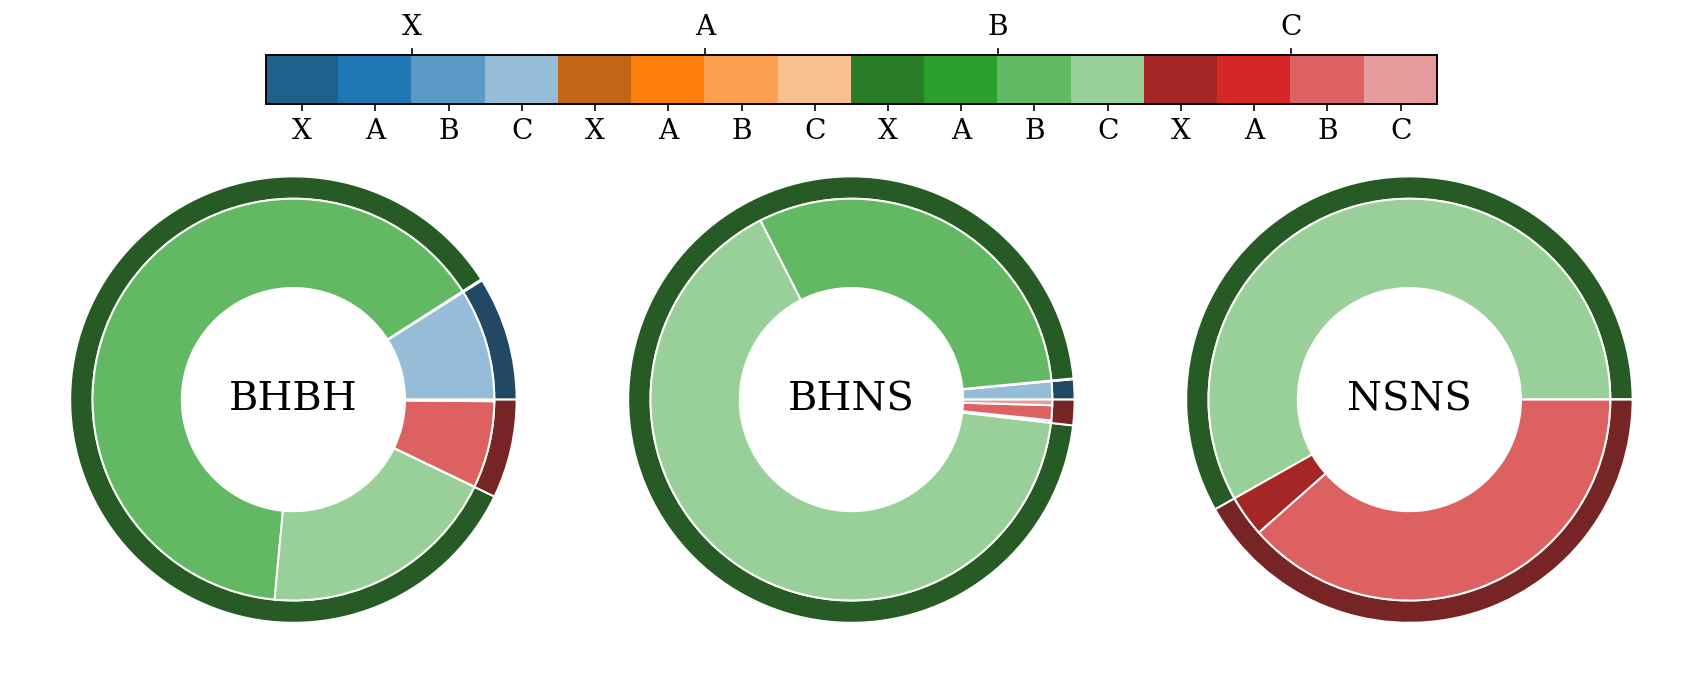

In [166]:
case_list = np.array([0, 1, 2, 3])
case_labels = np.array(["{}-{}".format(a, b)
                        for a in MT_case_translate[case_list]
                        for b in MT_case_translate[case_list]])

inner_colours = case_colours[:, 1:, :].reshape(16, 3)
outer_colours = case_colours[:, 0]

model = 0
fig, axes = plt.subplots(1, 3, figsize=(15, 15))
fig.subplots_adjust(wspace=0.0)
for dco_type in dco_types:
    with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[model]["file"]), "r") as f:
        full_data = f["simulation"][...].squeeze()
        mask = full_data["snr"] > 7

        data = full_data[mask]
        
    fractions = np.zeros((4, 4))
        
    for case in case_list:
        for case2 in case_list:
            matches = np.logical_and(data["MT1_case"] == case,
                                      data["MT2_case"] == case2)
            fractions[case, case2] = np.sum(data["weight"][matches]) / np.sum(data["weight"])
            print(case, case2, fractions[case, case2])
    
    # plot the outer pie plot
    
#     fig, ax = plt.subplots()

    size = 0.1

#     ax.pie(vals.flatten(), radius=1-size, colors=inner_colors,
#            wedgeprops=dict(width=size, edgecolor='w'))

#     ax.set(aspect="equal", title='Pie plot with `ax.pie`')
#     plt.show()
    
    outer = fractions.sum(axis=1)
    outer_mask = outer > 0.00
    axes[dco_types.index(dco_type)].pie(outer[outer_mask], radius=1,
                                        colors=outer_colours[outer_mask],
                                        normalize=False, wedgeprops=dict(width=size, edgecolor='w'))
    
    inner = fractions.flatten()
    inner_mask = inner > 0.00
    
    axes[dco_types.index(dco_type)].pie(inner[inner_mask], radius=1 - size,
                                        colors=inner_colours[inner_mask],
                                        normalize=False, wedgeprops=dict(width=size * 4, edgecolor='w'))
    axes[dco_types.index(dco_type)].annotate(dco_type, xy=(0, 0), ha="center", va="center", fontsize=fs)
    
#     axes[dco_types.index(dco_type)].set_xlabel(dco_type)
    
cmap = matplotlib.colors.ListedColormap(case_colours[:, 1:, :].reshape(16, 3))
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap), ax=axes, fraction=0.03, pad=0.01, location="top", shrink=0.7)
cbar.set_ticks([x / 32 for x in range(1, 32, 2)])
cbar.set_ticklabels(["X", "A", "B", "C"] * 4)
cbar.ax.set_aspect("auto")

ax2 = cbar.ax.twiny()
ax2.set_xticks([1/8, 3/8, 5/8, 7/8])
ax2.set_xticklabels(["X", "A", "B", "C"])

# plt.savefig("../../paper/figures/MT_cases_fiducial.png", dpi=1200, bbox_inches="tight")
    
plt.show()

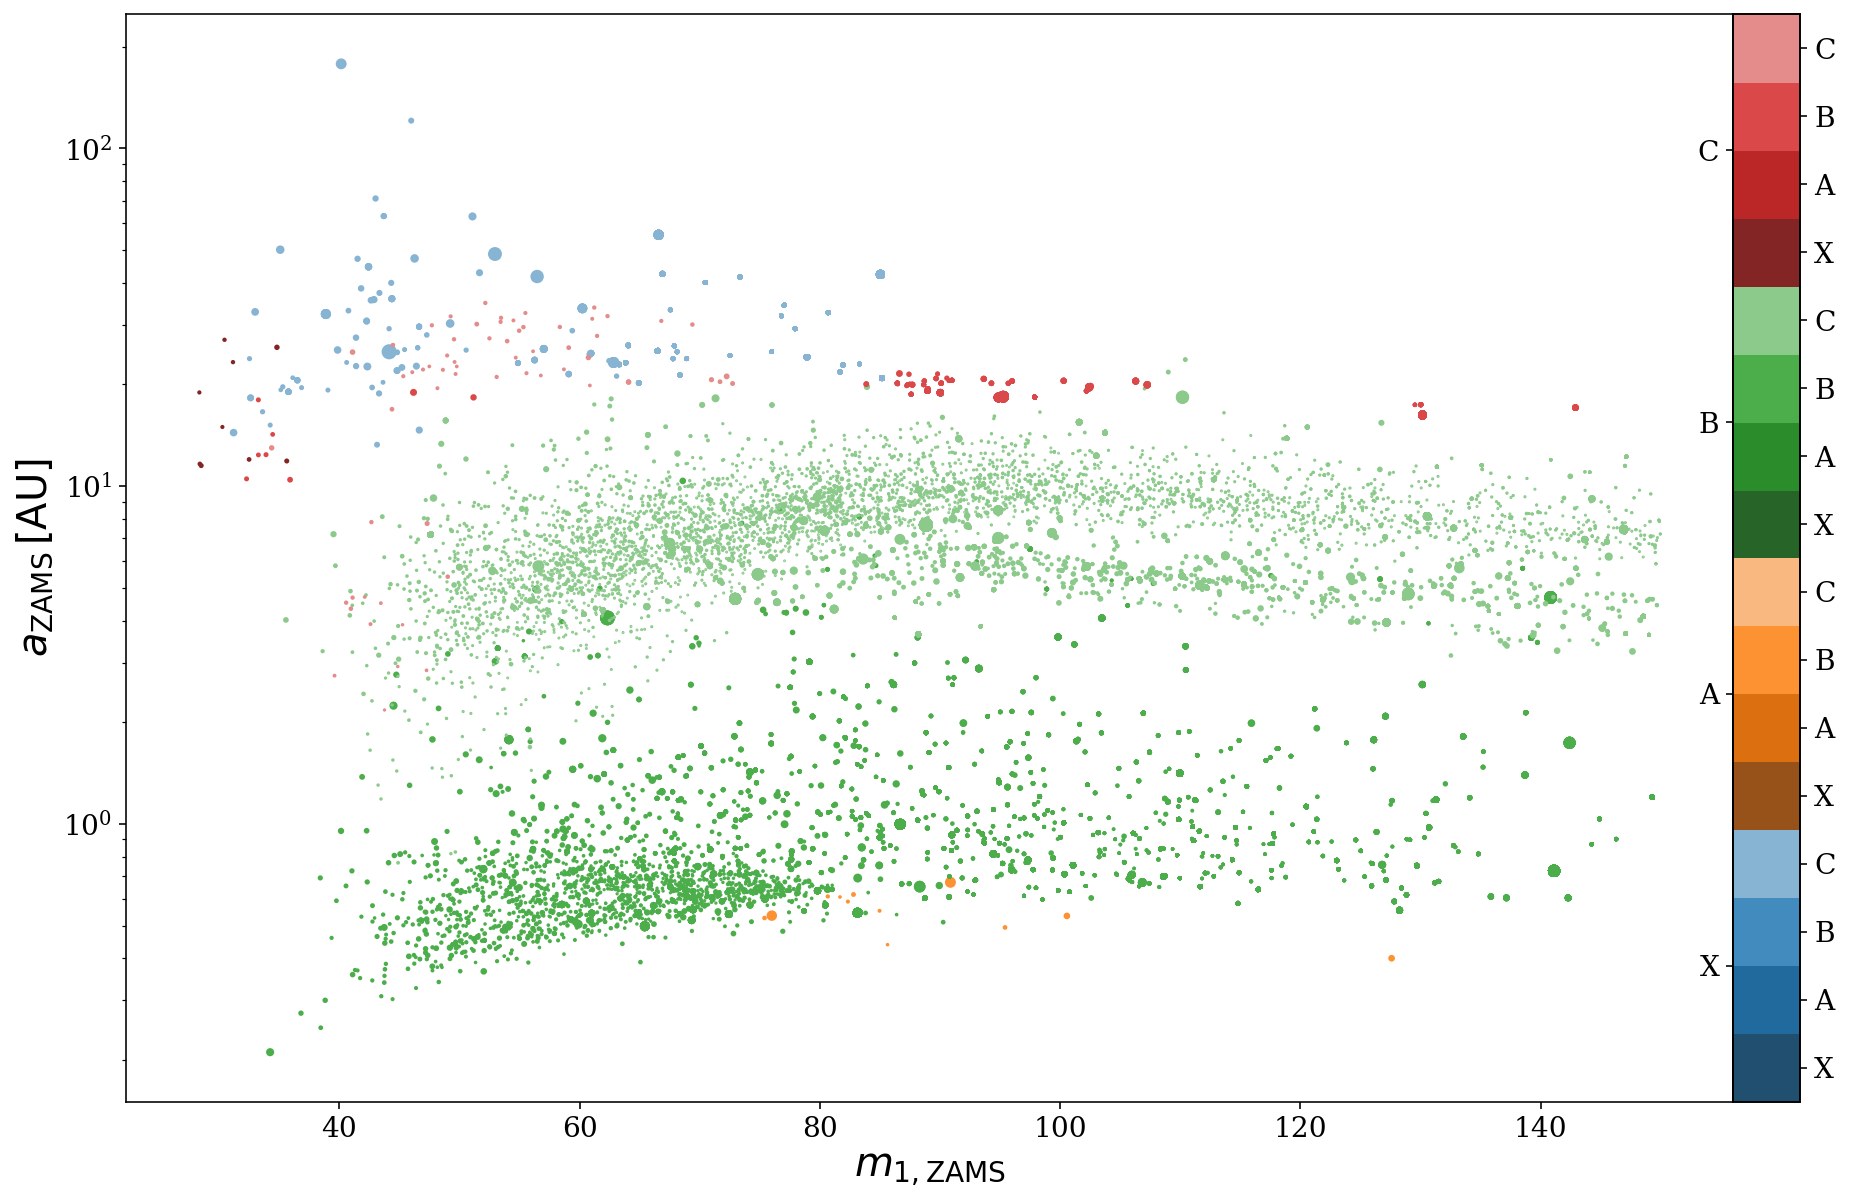

In [104]:
fig, ax = plt.subplots(figsize=(15, 10))

model = 0

with h5.File(sim_folder + "{}_{}_all.h5".format("BHBH", variations[model]["file"]), "r") as f:
    full_data = f["simulation"][...].squeeze()
    snr_mask = full_data["snr"] > 7

    data = full_data[snr_mask]

m1 = np.maximum(data["m_1_ZAMS"], data["m_2_ZAMS"])
m2 = np.minimum(data["m_1_ZAMS"], data["m_2_ZAMS"])
q = m2 / m1

for case in case_list:
    for case2 in case_list:
        mask = np.logical_and(data["MT1_case"] == case,
                              data["MT2_case"] == case2)

        ax.scatter(m1[mask], data["a_ZAMS"][mask], s=data["weight"][mask] * 50, color=case_colours[case, case2 + 1])#, label=case_labels[(case * 4) + case2])

cmap = matplotlib.colors.ListedColormap(case_colours[:, 1:, :].reshape(16, 3))
cbar = fig.colorbar(matplotlib.cm.ScalarMappable(cmap=cmap), fraction=0.04, pad=0.0)
cbar.set_ticks([1/8, 3/8, 5/8, 7/8])
cbar.set_ticklabels(["X", "A", "B", "C"])
cbar.ax.set_aspect("auto")

ax2 = cbar.ax.twinx()
ax2.set_yticks([x / 32 for x in range(1, 32, 2)])
ax2.set_yticklabels(["X", "A", "B", "C"] * 4)

ax.set_yscale("log")

ax.set_xlabel(r"$m_{1, \rm ZAMS}$")
ax.set_ylabel(r"$a_{\rm ZAMS}\, [\rm AU]$")

plt.savefig("../../paper/figures/BHBH_q_a_ZAMS_cases.png", dpi=400)

plt.show()

In [3]:
def kdeplot_by_channel(variable, dco_type_list=["BHBH", "BHNS", "NSNS"], channels=[0, 1, 2, 3, 4], variation_index=0, show=True, fig=None, ax=None, **kwargs):
    if fig is None or ax is None:
        fig, ax = plt.subplots(1, figsize=(10, 5))

    for dco_type in dco_type_list:
        with h5.File(sim_folder + "{}_{}_all.h5".format(dco_type, variations[variation_index]["file"]), "r") as f:
            full_data = f["simulation"][...].squeeze()
            mask = np.logical_and(full_data["snr"] > 7, np.isin(full_data["channel"], channels))

            data = full_data[mask]
            print(len(data))

        sns.kdeplot(data[variable], weights=data["weight"], color=dco_colours[dco_type], cut=0, **kwargs, ax=ax)

    if show:
        print("yo")
        plt.show()
    return fig, ax